In [1]:
###(C) Prabhash Kumar Jha & Isheta Jha ###

###Polynomial Features#######

import numpy as np
import matplotlib.pyplot as plt
def Getpolymatrix(dataset,n):
    Matrix = [[0 for x in range(n)] for y in range(len(dataset))]  #X data set in polynominal format
    k = 0
    for data in dataset:
        temp = []
        for i in range(n):
            temp=np.append(temp,data**i)
        Matrix[k] = temp
        k = k+1

    return Matrix

In [2]:
def GetData( ):
    input_var = []
    out_var = []
    f = open("LinRegData.txt","r")
    lines = f.readlines()
    for x in lines:
        fields = x.split(' ')
        input_var = np.append(input_var,float(fields[3]))
        if fields[5]=='':
            out_var = np.append(out_var,float(fields[6]))
        else:
            out_var = np.append(out_var,float(fields[5]))
    f.close()

   
    return input_var,out_var

In [3]:
input_var,out_var=GetData();
dataset=np.vstack((input_var,out_var))
training_set = np.array([input_var[0:20] ,out_var[0:20]])
testing_set = np.array([input_var[20:151] ,out_var[20:151]])

In [4]:



maxorder =22;
N = np.arange(1,maxorder+1, 1);
lmda = 0.000001;
RMSE_testing = [0 for x in range(maxorder)]
RMSE_training = [0 for x in range(maxorder)]
t = 0;
for n in N: #check for each model order
    Matrix_training = Getpolymatrix(training_set[0],n); #get feature 
    X = np.array(Matrix_training)
    Xt = np.transpose(np.array(Matrix_training))
    Xty = np.matmul(Xt,training_set[1])
    wCap = np.matmul(Xt,X)+lmda*np.identity(n)
    Wfinal = np.linalg.solve(wCap, Xty)
    #display(Wfinal)
    MatrixTesting = Getpolymatrix(testing_set[0],n);#X data set in polynominal format
    
    final = np.inner(Wfinal,MatrixTesting)  #predicted data with the given weights
    RMSE_testing[t] = 0.5*(sum((testing_set[1]-final)**2)/len(testing_set[1]))
    
    final_training = np.inner(Wfinal,Matrix_training) 
    RMSE_training[t] = 0.5*(sum((training_set[1]-final_training)**2)/len(training_set[1]))
    t = t+1
    
#best result with n=13 but order is 12

min_index=np.argmin(RMSE_testing)
display("order for minimum RMSE");
display(min_index)
display("minimum RMSE for testing")
display(RMSE_testing[min_index])

n=min_index+1 
Matrix_training=Getpolymatrix(training_set[0],n);
X=np.array(Matrix_training)
Xt=np.transpose(np.array(Matrix_training))
Xty=np.matmul(Xt,training_set[1])
#wCap=np.linalg.inv(np.matmul(Xt,X)+lmda*np.identity(n))
#Wfinal=np.dot(wCap,Xty)
#wCap = np.linalg.inv(np.matmul(Xt,X)+lmda*np.identity(n))
wCap = np.matmul(Xt,X)+lmda*np.identity(n)
Wfinal = np.linalg.solve(wCap, Xty)
#Wfinal = np.dot(wCap,Xty)  #Woptimal

MatrixTesting = Getpolymatrix(testing_set[0],n);#X data set in polynominal format
Matrix =  Getpolymatrix(input_var,n);#
final = np.inner(Wfinal,Matrix) 
final_testing=np.inner(Wfinal,MatrixTesting)  #predicted data with the given weights
final_training=np.inner(Wfinal,Matrix_training) 



'order for minimum RMSE'

12

'minimum RMSE for testing'

0.008423757731355952

In [5]:
min_index=np.argmin(RMSE_training)
display("order for minimum RMSE");
display(min_index)
display("minimum RMSE for testing")
display(RMSE_training[min_index])

'order for minimum RMSE'

21

'minimum RMSE for testing'

0.00048195691030945294

In [6]:
final_training

array([ 1.35642818,  0.40282846,  1.15274982,  0.34773667, -0.73716646,
        0.2928817 ,  0.2179873 ,  0.68750841,  0.40282846,  0.05852343,
        0.42506701, -0.48654465, -0.56190345,  0.6441787 ,  0.27916372,
       -0.22315034,  0.06201018,  1.15090589,  0.48251517, -0.50497311])

In [7]:
training_set[1]

array([ 1.360872  ,  0.37735483,  1.0485079 ,  0.46293536, -0.92192148,
        0.31120067,  0.15119428,  0.77384743,  0.37735483,  0.17363519,
        0.42304734, -0.4349667 , -0.57629434,  0.71635736,  0.22205865,
       -0.16468948, -0.01989175,  1.1351331 ,  0.50176375, -0.46792218])

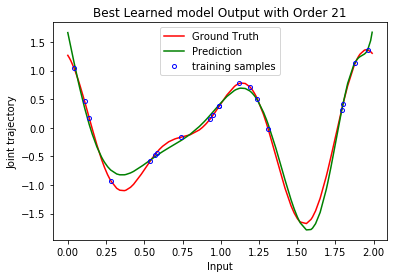

In [8]:

order = np.argsort(dataset[0])
xs = np.array(dataset[0])[order]
ys = np.array(dataset[1])[order]

plt.plot(xs,ys,'r',label="Ground Truth")
order1 = np.argsort(input_var)
xs1 = np.array(input_var)[order1]
ys1 = np.array(final)[order1]
plt.plot(xs1,ys1,'g',label="Prediction")
plt.plot(training_set[0],training_set[1],'bo',markersize=4,fillstyle='none',label='training samples')
plt.legend(loc='upper center')
plt.title('Best Learned model Output with Order %i'%min_index)
plt.ylabel('Joint trajectory')
plt.xlabel('Input')
plt.show()

plt.plot(N-1,np.log(RMSE_testing),'ro',label="Testing set")
plt.plot(N-1,np.log(RMSE_training),'bo',label="Training set")
plt.plot(N-1,np.log(RMSE_testing),'r')
plt.plot(N-1,np.log(RMSE_training),'b')
plt.axvline(x=min_index, color='y',label='minima of RMSE testing')


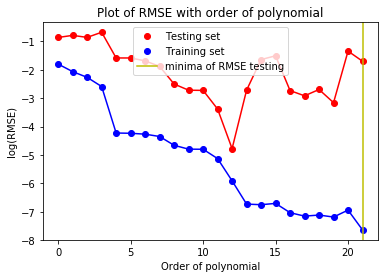

In [9]:
#plt.plot(N,RMSE_testing,'r',label="Testing set")
#plt.plot(N,RMSE_training,'b',label="Training set")
plt.ylabel('log(RMSE)')
plt.xlabel('Order of polynomial')
plt.legend(loc='upper center')
plt.title("Plot of RMSE with order of polynomial")
plt.show()


In [10]:
#####Gaussian Features#####

def Getgaussmatrix(dataset,n): #n number of basis fn
    Matrix = [[0 for x in range(n)] for y in range(len(dataset))]  #X data set in polynominal format
    mu = np.linspace(0,2,n)
    sigma2 = 0.02
    #w=np.random.randn(10)
    k = 0
    for data in dataset:
        temp = []
        for i in range(n):
            ep=np.exp((-(data-mu[i])**2)/(2*sigma2));
            temp = np.append(temp,ep)
        Matrix[k] = temp/sum(temp) #ensure normalization
        k = k+1
    return Matrix

In [11]:
###Gaussian features with different basis functions###

Ng = np.arange(15,40+1, 1);
lmda = 0.000001;
RMSEGauss_testing=[0 for x in range(len(Ng))]
RMSEGauss_training=[0 for x in range(len(Ng))]
t=0;
for n in Ng: #check for each model order    n=20
    Matrix=Getgaussmatrix(training_set[0],n);
    X=np.array(Matrix)
    Xt=np.transpose(np.array(Matrix))
    Xty=np.matmul(Xt,training_set[1])
    #wCap=np.linalg.inv(np.matmul(Xt,X)+lmda*np.identity(n))
    #Wfinal=np.dot(wCap,Xty)
    wCap = np.matmul(Xt,X)+lmda*np.identity(n)
    Wfinal = np.linalg.solve(wCap, Xty)
    MatrixTesting = Getgaussmatrix(testing_set[0],n);#X data set in polynominal format
    final=np.inner(Wfinal,MatrixTesting)  #predicted data with the given weights
    RMSEGauss_testing[t]=0.5*(sum((testing_set[1]-final)**2)/len(testing_set[1]))
    final_training=np.inner(Wfinal,Matrix) 
    RMSEGauss_training[t]=0.5*(sum((training_set[1]-final_training)**2)/len(training_set[1]))
    t=t+1

'Minimum number of basis functions'

29

'RMSE for testing'

0.00011905164527102239

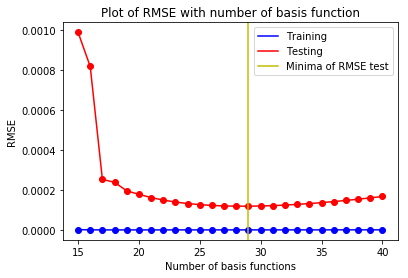

In [12]:

min_index=np.argmin(RMSEGauss_testing)
display("Minimum number of basis functions")
display(min_index+15)
display("RMSE for testing")
display(RMSEGauss_testing[min_index])
plt.plot(Ng,RMSEGauss_training,'b',label='Training')
plt.plot(Ng,RMSEGauss_testing,'r',label='Testing')
plt.plot(Ng,RMSEGauss_training,'bo')
plt.plot(Ng,RMSEGauss_testing,'ro')
plt.axvline(x=min_index+15, color='y',label='Minima of RMSE test')
plt.ylabel('RMSE')
plt.xlabel('Number of basis functions')
plt.title("Plot of RMSE with number of basis function")
plt.legend(loc='upper right')
plt.show()